In [1]:
import pandas as pd

## 피처 데이터들의 설명

- Gender : 성별
- Age : 나이
- Height : 키
- family_history_with_overweight : 비만 가족력 유무
- FAVC : 고칼로리 음식을 저주 섭취하는지에 대한 이진 변수
- FCVC : 야채 섭취 빈도
- NCP : 개인이 소비하는 주요 식사 횟수
- CAEC : 식품, 보충제의 소비 빈도를 설명하는 범주형 변수
- SMOKE : 흡연유무
- CH2O : 물 소비와 관련되 척도
- SCC : 사람의 칼로리 소비를 모니터링하는 날씨
- FAF : 신체 활동과 관련되 척도 하루 또는 특정 기간 동안 신체 활동에 소비한 시간
- TUE : tv앞에서 보내는 시간과 관련된 지표
- CALC : 알코올 소비량
- MTRANS : 선호하는 운송 수단
- NObeyesdad : 비만유형이나 체중 범주

# 데이터 불러오기, 형태 확인

In [2]:
train=pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


# id와 같은 불필요한 즉 패턴이 없는 피처데이터 컬럼을 지워 준다.

In [6]:
X_train_id=train.pop('id')
X_test_id=test.pop('id')

In [7]:
y = train.pop('NObeyesdad')

In [8]:
train_data=train
test_data=test

In [94]:
test_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [10]:
train_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile


# 각 피처 데이터들 시각화

In [11]:
import numpy as np

cat_cols_tr = list(train_data.select_dtypes(exclude=np.number).columns)
num_cols_tr = list(train_data.select_dtypes(include=np.number).columns)

In [12]:
cat_cols_tr

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [13]:
num_cols_tr

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

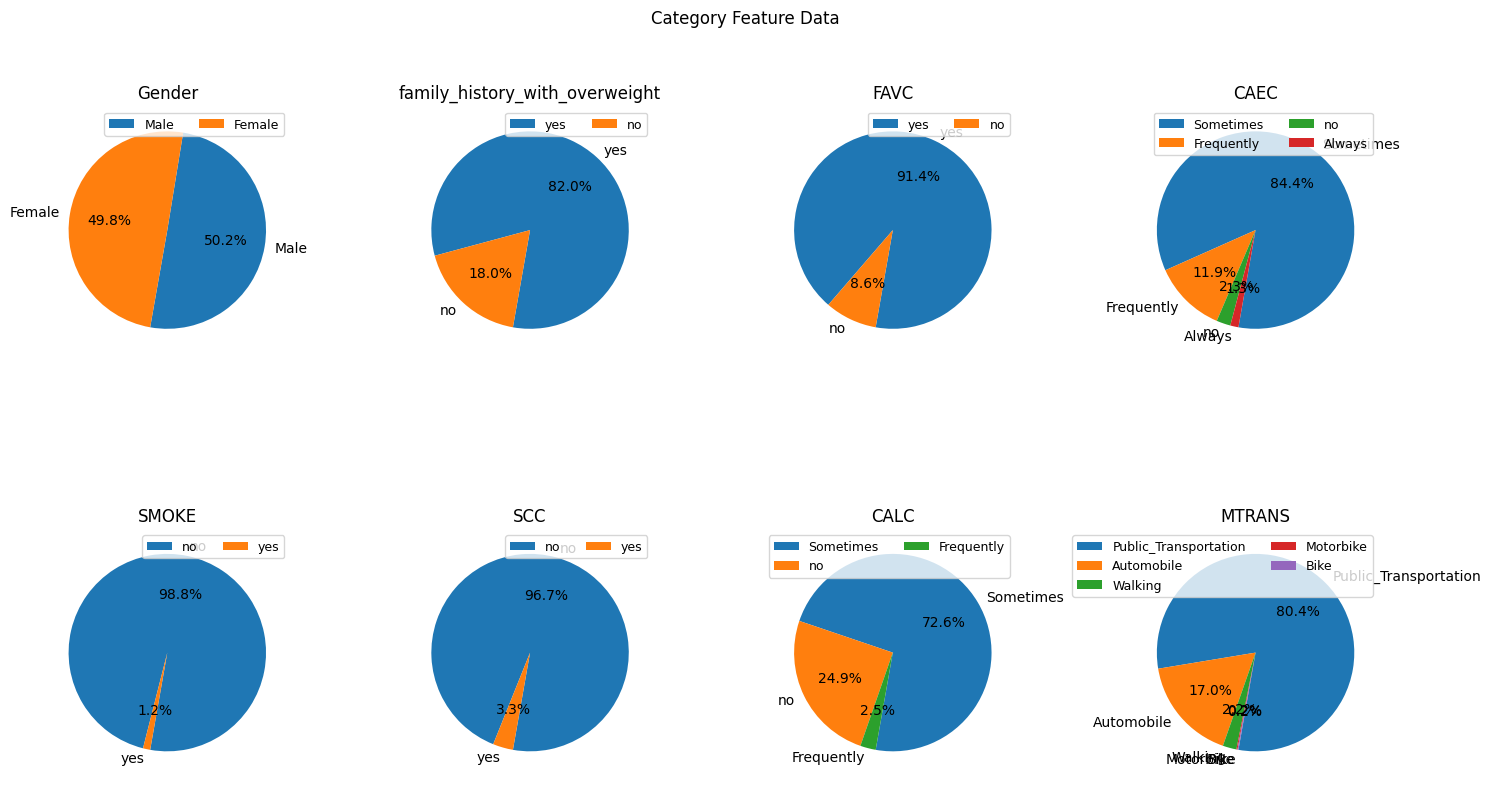

In [24]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(2,4,figsize=(15,9))

for i,v in enumerate(cat_cols_tr):
    rows = i//4,
    cols = i%4,
    ratio = train_data[v].value_counts()/train_data[v].count()*100
    labels=train_data[v].unique()
    ax[rows][cols].pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=True)
    ax[rows][cols].set_title(v)

    ax[rows][cols].legend(labels, loc='upper right', ncols=2, fontsize=9)

plt.tight_layout()
plt.suptitle('Category Feature Data')    
plt.show()

### 카테고리형 피처 데이터는 Gender를 빼고 너무 불균형이 심하다

In [54]:
age_list= list(train_data['Age'].unique())

In [56]:
len(age_list)

1703

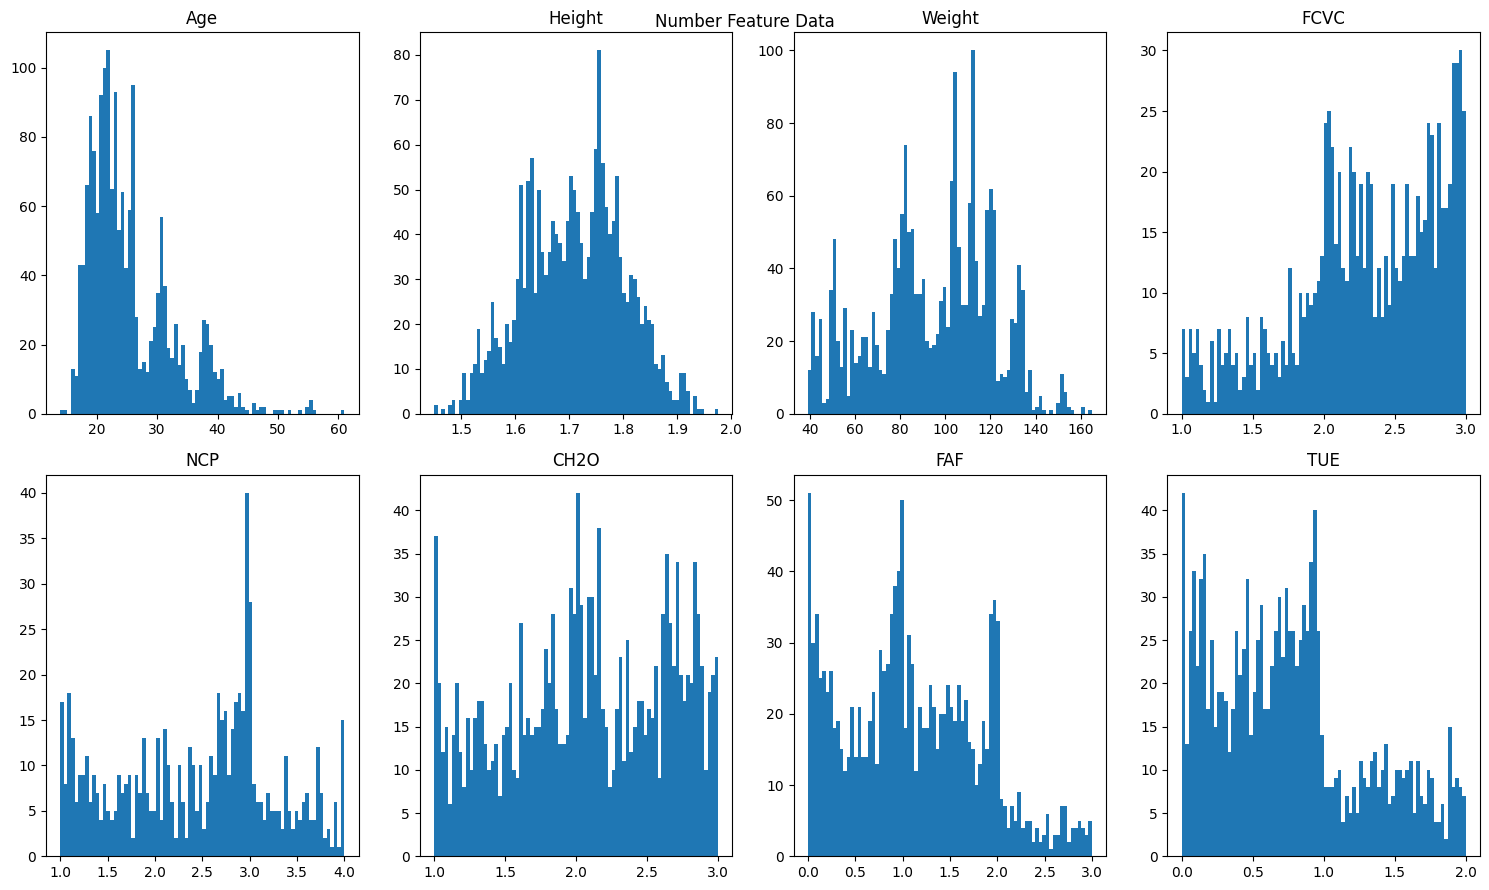

In [81]:
fig,ax = plt.subplots(2,4,figsize=(15,9))

for i,v in enumerate(num_cols_tr):
    rows = i//4,
    cols = i%4,
    num_list = list(train_data[v].unique())
    ax[rows][cols].hist(train_data[v].unique(), bins=80, histtype='barstacked')
    ax[rows][cols].set_title(v)


plt.tight_layout()
plt.suptitle('Number Feature Data')
plt.show()

### 연속적인 숫자형 데이터들의 분포를 봤을 때 Height을 제외하고는 정규분포를 따르지 않는다

# 데이터 분리

In [82]:
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, y, stratify=y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14530, 16), (6228, 16), (14530,), (6228,))

# pipeline을 이용해서 데이터 전처리를 진행하고 RandomizedSearchCV를 이용해서 최적의 하이퍼 파라미터와 교차검증을 진행
- 시간이 너무 오래 걸려서 결과값만 가지고 오겠다.

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransfomer
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import RandomizedSearchCV

# from sklearn.metrics import accuracy_score

# from scipy.stats import loguniform

# import warnings
# warnings.filterwarnings('ignore')

# params={
#     'clf__learning_rate': loguniform(0.001, 0.1),
#     'clf__n_estimators': np.arange(100,1000),
#     'clf__max_depth': np.arange(5,30),
#     'clf__min_child_samples': np.arange(10,21),
#     'clf__colsample_bytree': loguniform(0.1,1.1),
#     'clf__reg_lambda': loguniform(0.1,1.1),
#     'clf__reg_alpha': loguniform(0.1,1.1),
#     'clf__subsample': loguniform(0.5, 1.5),
#     'clf__num_leaves': np.arange(30,60),
#     'clf_objective' : 'multiclass',
#     'clf_num_class' : 7,
# }

# columns_transform = ColumnTransfomer([
#     ('scaler', StandardScaler(), num_cols_tr),
#     ('encoder', OneHotEncoder(), cat_cols_tr),
# ],remainder='passthrough')

# pipeine = ([
#     ('preprocessing', columns_transform),
#     ('clf', LGBMClassifier(random_state=42))
# ])

# random_cv = RandomizedSearchCV(estimator = pipeline,
#                                n_iters=200,
#                                scoring='accuracy',
#                                n_jobs=-1,
#                                cv=5
#                               )

# random_cv.fit(X_train,y_train)

## RandomizedSearchCV를 통해 찾은 최적의 하이퍼 파라미터를 넣고 파이프라인으로 LGBMClassifier로 모델 학습을 진행한다.

In [88]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

from scipy.stats import loguniform 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

params={
    'learning_rate': 0.026,
    'n_estimators': 238,
    'max_depth': 21,
    'min_child_samples': 20,
    'colsample_bytree': 0.448,
    'reg_lambda': 0.8,
    'reg_alpha': 0.136,
    'subsample': 0.752,
    'num_leaves': 48,
    'objective' : 'multiclass',
    'num_class' : 7
}


columns_transform = ColumnTransformer(
    transformers=[
    ('scaler', StandardScaler(), num_cols_tr),
    ('encoder', OneHotEncoder(), cat_cols_tr),
],remainder='passthrough')


lgbm = LGBMClassifier(**params, random_state=42)


pipeline=Pipeline(
    steps=[('preprocessing',columns_transform),
           ('model', lgbm)
])

pipeline.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2044
[LightGBM] [Info] Number of data points in the train set: 14530, number of used features: 30
[LightGBM] [Info] Start training from score -2.107498
[LightGBM] [Info] Start training from score -1.907497
[LightGBM] [Info] Start training from score -1.964737
[LightGBM] [Info] Start training from score -1.854675
[LightGBM] [Info] Start training from score -1.635232
[LightGBM] [Info] Start training from score -2.146176
[LightGBM] [Info] Start training from score -2.108065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('model',
                 LGBMClassifier(colsample_bytree=0.448, learning_rate=0.026,
                                max_depth=21, n_estimators=238, num_class=7,
                                num_leaves=48, objective='multiclass',
                                random_state=42, reg_alpha=0.136,
                                reg_lambda=0.8, subsample=0.752))])

## 학습된 모델로 테스트를 진행 후 정확도를 확인한다.

In [96]:
pred = pipeline.predict(X_test)

In [99]:
accuracy_score(pred, y_test)

0.911689145793192